In [43]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [94]:
files = glob.glob('../results/a0-Apr4/e*') 

In [95]:
files, len(files)

(['../results/a0-Apr4/errors1.pkl.gz',
  '../results/a0-Apr4/errors0.pkl.gz',
  '../results/a0-Apr4/errors4.pkl.gz',
  '../results/a0-Apr4/errors5.pkl.gz',
  '../results/a0-Apr4/errors9.pkl.gz',
  '../results/a0-Apr4/errors8.pkl.gz',
  '../results/a0-Apr4/errors2.pkl.gz',
  '../results/a0-Apr4/errors6.pkl.gz',
  '../results/a0-Apr4/errors10.pkl.gz',
  '../results/a0-Apr4/errors11.pkl.gz',
  '../results/a0-Apr4/errors7.pkl.gz',
  '../results/a0-Apr4/errors3.pkl.gz',
  '../results/a0-Apr4/errors12.pkl.gz',
  '../results/a0-Apr4/errors13.pkl.gz',
  '../results/a0-Apr4/errors33.pkl.gz',
  '../results/a0-Apr4/errors36.pkl.gz',
  '../results/a0-Apr4/errors40.pkl.gz',
  '../results/a0-Apr4/errors14.pkl.gz',
  '../results/a0-Apr4/errors41.pkl.gz',
  '../results/a0-Apr4/errors18.pkl.gz',
  '../results/a0-Apr4/errors22.pkl.gz',
  '../results/a0-Apr4/errors16.pkl.gz',
  '../results/a0-Apr4/errors17.pkl.gz',
  '../results/a0-Apr4/errors47.pkl.gz',
  '../results/a0-Apr4/errors15.pkl.gz',
  '../resu

In [90]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [91]:
list(enumerate(ex_list[0]))

[(0, '../results/a0-Apr4/errors1.pkl.gz'),
 (1, array([ 0.03303183,  0.03251299,  0.03297947,  0.03315945,  0.03271703,
          0.03271257,  0.03212267,  0.03333069,  0.03216052,  0.03323533,
          0.03276104,  0.03231452])),
 (2, array([ 0.06724359,  0.06716014,  0.06716014,  0.06716014,  0.06716014,
          0.06716014,  0.06716014,  0.06716014,  0.06716014,  0.06716014,
          0.06716014,  0.06716014])),
 (3, 13.616647005081177),
 (4, 0.032592006),
 (5, 0.067160144),
 (6, nan),
 (7, nan),
 (8, 0.050293203),
 (9, 0.09301959),
 (10, 8.325005710942291e-07),
 (11, 5.775204592442915e-09),
 (12, 1.1749113515460073e-05),
 (13, 0.5179318341913395)]

In [92]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.005
        ex[7] = 0.005
        ex[8] = 0.005
        ex[9] = 0.005

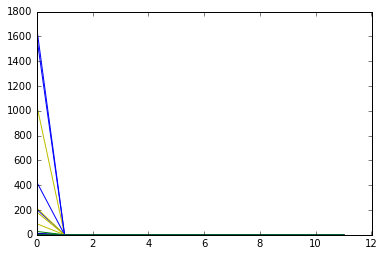

In [93]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

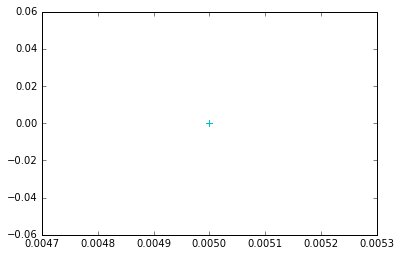

In [85]:
# トレーニングエラー小さいほうが、テスト誤差との残差も小さい
# 過学習してない
# もっとモデル大きくてもいい
plt.plot([ex[6] for ex in ex_list], [ex[7] - ex[6] for ex in ex_list], "c+")

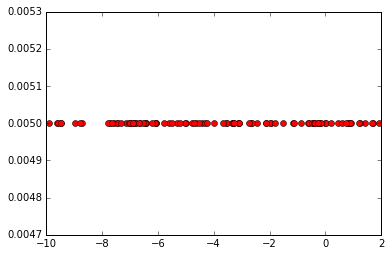

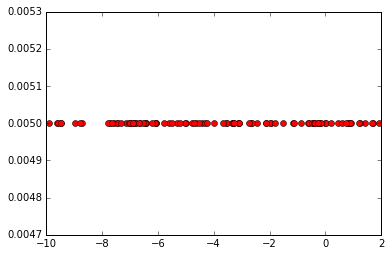

In [87]:
# l2 高いと不安定になる
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')

plt.figure()
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')


(0.0, 0.005)

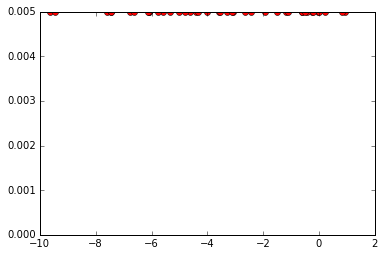

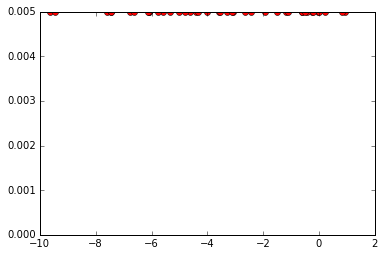

In [78]:
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[10] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.005)